In [1]:
import numpy as np
import matplotlib.pyplot as plt

%precision 3
%matplotlib inline

In [2]:
x_set = np.arange(2,13)
y_set = np.arange(1,7)

In [3]:
def f_XY(x,y):
    if 1 <= y and 1 <= x - y <= 6:
        return y * (x-y)/ 441
    else:
        return 0

In [4]:
XY = [x_set, y_set, f_XY]

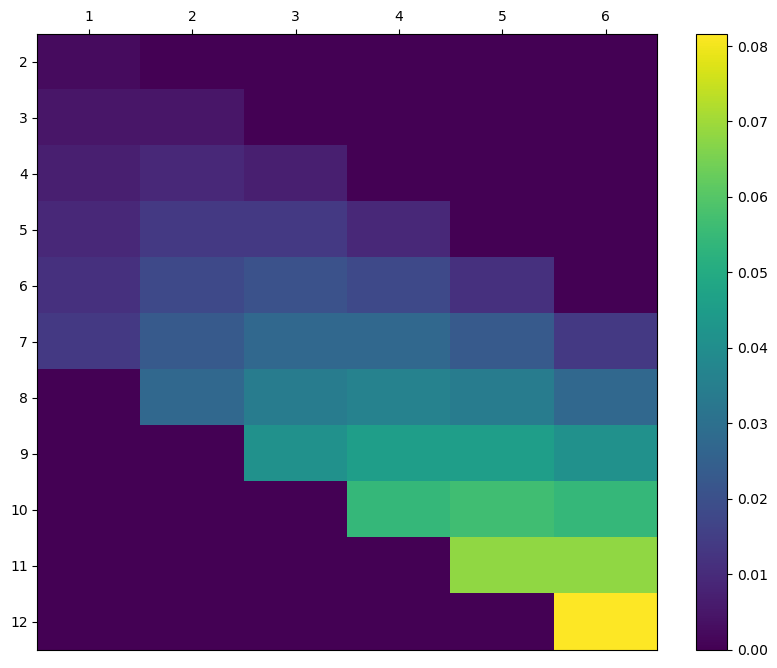

In [5]:
prob = np.array([[f_XY(x_i, y_j) for y_j in y_set]
                 for x_i in x_set])

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)

c = ax.pcolor(prob)

ax.set_xticks(np.arange(prob.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(prob.shape[0]) + 0.5, minor=False)

ax.set_xticklabels(np.arange(1, 7), minor=False)
ax.set_yticklabels(np.arange(2, 13), minor=False)

# y축을 내림차순(위→아래) 대신 반대로(아래→위) 배치
ax.invert_yaxis()

# x축의 눈금을 그래프 위쪽에 표시
ax.xaxis.tick_top()

fig.colorbar(c, ax=ax)
plt.show()

In [6]:
np.all(prob >= 0) 

np.True_

In [7]:
np.sum(prob)  

1.000

In [8]:
def f_X(x):
    return np.sum([f_XY(x, y_k) for y_k in y_set])

In [9]:
def f_Y(y):
    return np.sum([f_XY(x_k, y) for x_k in x_set])

In [10]:
X = [x_set, f_X]
Y = [y_set, f_Y]

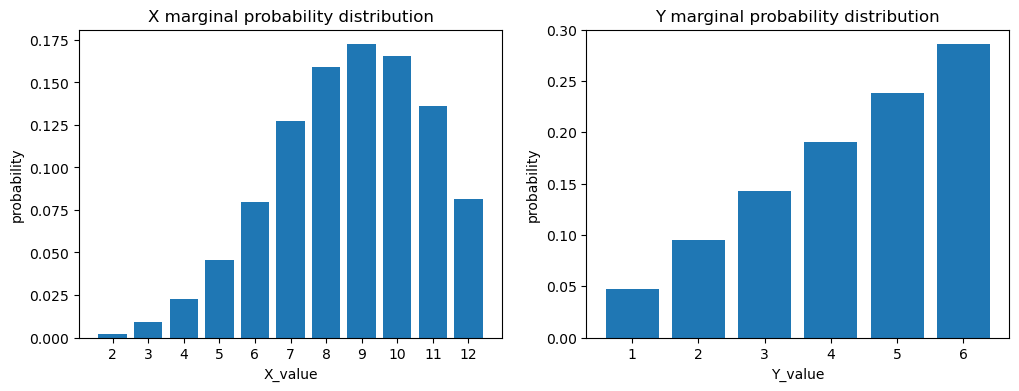

In [11]:
prob_x = np.array([f_X(x_k) for x_k in x_set])
prob_y = np.array([f_Y(y_k) for y_k in y_set])

fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.bar(x_set, prob_x)
ax1.set_title('X marginal probability distribution')
ax1.set_xlabel('X_value')
ax1.set_ylabel('probability')
ax1.set_xticks(x_set)

ax2.bar(y_set, prob_y)
ax2.set_title('Y marginal probability distribution')
ax2.set_xlabel('Y_value')
ax2.set_ylabel('probability')

plt.show()

In [12]:
np.sum([x_i * f_XY(x_i, y_j) 
        for x_i in x_set 
        for y_j in y_set])

8.667

In [13]:
def E(XY, g):
    x_set, y_set, f_XY = XY
    return np.sum([g(x_i, y_j) * f_XY(x_i, y_j)
                   for x_i in x_set for y_j in y_set])

In [14]:
mean_X = E(XY, lambda x, y: x)
mean_Y = E(XY, lambda x, y: y)

mean_X, mean_Y

(8.667, 4.333)

In [15]:
a, b = 2, 3

E(XY, lambda x, y: a*x + b*y)
a * mean_X + b * mean_Y

30.333

In [16]:
np.sum([((x_i - mean_X)**2) * f_XY(x_i, y_j)
        for x_i in x_set for y_j in y_set])

4.444

In [17]:
def V(XY, g):
    x_set, y_set, f_XY = XY
    mean = E(XY, g)
    return np.sum([((g(x_i, y_j) - mean)**2) * f_XY(x_i, y_j)
                   for x_i in x_set for y_j in y_set])

In [18]:
var_X = V(XY, g=lambda x, y: x)
var_Y = V(XY, g=lambda x, y: y)

var_X, var_Y

(4.444, 2.222)

In [19]:
def Cov(XY):
    x_set, y_set, f_XY = XY

    mean_X = E(XY, lambda x, y: x)
    mean_Y = E(XY, lambda x, y: y)

    return np.sum([((x_i - mean_X) * (y_j - mean_Y)) * f_XY(x_i, y_j)
                   for x_i in x_set for y_j in y_set])

In [20]:
cov_xy = Cov(XY)
cov_xy

2.222

In [21]:
V(XY, lambda x, y: a*x + b*y)

64.444

In [22]:
a**2 * var_X + b**2 * var_Y + 2 * a * b * cov_xy

64.444

In [23]:
cov_xy / np.sqrt(var_X * var_Y)

0.707